## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Get Data Labels

In [3]:
classes=[]
filename='input'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


## Resize images and put together Training and Testing Datasets

In [4]:
X_train = []
y_train = []
image_size = 160
for i in classes:
    path_train = os.path.join(filename,'Training',i)
    for j in tqdm(os.listdir(path_train)): 
        img = cv2.imread(os.path.join(path_train,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    path_test = os.path.join(filename,'Testing',i)
    for j in tqdm(os.listdir(path_test)):
        img = cv2.imread(os.path.join(path_test,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)    

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 56.42it/s]


## Data augmentation and splitting

In [5]:
#data augmentation
X_train, y_train = shuffle(X_train,y_train, random_state=42)
datagen = ImageDataGenerator(
    rotation_range=7, #rotate images
    width_shift_range=0.05,
    height_shift_range=0.05, #shift image in horizontal and vertical
    zoom_range=0.1, #zoom images
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape
lb = LabelEncoder()

#train and test splitting 
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.15,random_state=42,stratify=y_train)

labels_train=lb.fit(y_train)
y_train=lb.transform(y_train)
y_test=lb.transform(y_test)

## Train the model

In [23]:
# # base_model = EfficientNetV2B0(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))

# # # Freeze the base model
# # base_model.trainable = False

# # # Get the output tensor of the base model
# # x = base_model.output
# # x = keras.layers.Reshape((1, 1, -1))(x)
# # x = tf.keras.layers.GlobalAveragePooling2D()(x)
# # x = tf.keras.layers.Dropout(rate=0.5)(x)
# # x = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(x)
# # x = tf.keras.layers.Dropout(rate=0.33)(x)
# # x = tf.keras.layers.Dense(4,activation='softmax')(x)

# # # Create the new model
# # outputs = keras.layers.Dense(1, name="custom_output")(x)
# # model = keras.Model(inputs=base_model.input, outputs=outputs)

# # early_stopping_cb= EarlyStopping(patience=5,restore_best_weights=True)
# # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)

# # # # Compile and train the model
# # # opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# # # model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
# # # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_cb, reduce_lr])

# # # Unfreeze the base model
# # base_model.trainable = True

# # # Recompile and continue training the model
# # opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# # model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
# # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_cb, reduce_lr])


# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetV2B0
# from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# # Encode labels (assuming y_train and y_test are categorical)
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.transform(y_test)

# # Load EfficientNetV2B0 model with pre-trained weights
# base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom head on top of the base model
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dropout(0.3)(x)
# x = Dense(128, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)  # Binary classification, use sigmoid activation

# # Create the model
# model = Model(inputs=base_model.input, outputs=outputs)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Define callbacks
# early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)

# # Train the model
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_cb, reduce_lr])

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy}")

# # Fine-tune the model by unfreezing some base model layers
# for layer in base_model.layers:  # Fine-tune the last 20 layers
#     layer.trainable = True

# # Recompile the model after unfreezing layers
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Continue training the model
# history_finetune = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_cb, reduce_lr])

# # Evaluate the fine-tuned model on test data
# test_loss_finetune, test_accuracy_finetune = model.evaluate(X_test, y_test)
# print(f"Fine-tuned Test Accuracy: {test_accuracy_finetune}")

base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top=False,
    input_shape=(image_size, image_size, 3),
)

# Freeze all layers in the base model initially
base_model.trainable = False

# Add classification head on top of the base model
inputs = layers.Input(shape=(image_size, image_size, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)  # Add dropout for regularization
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(4, activation='softmax')(x)  # 4 classes: glioma, meningioma, pituitary tumor, no tumor

model = Model(inputs, outputs)

# Set the learning rate
learning_rate = 0.001

# Compile the model with specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)


model.fit(X_train ,y_train,validation_data = (X_test,y_test),epochs=10,batch_size=32)


# Unfreeze specific layers in the base model for fine-tuning
# Here we unfreeze the last several layers of the base model
base_model.trainable = True
fine_tune_at = -50  # Fine-tune from the last 20 layers of the base model
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
learning_rate_fine_tune = 0.0001
optimizer_fine_tune = tf.keras.optimizers.Adam(learning_rate=learning_rate_fine_tune)
model.compile(
    optimizer=optimizer_fine_tune,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with fine-tuning
history=model.fit(X_train ,y_train,validation_data = (X_test,y_test),epochs=50,batch_size=32)


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 60s 406ms/step - accuracy: 0.2669 - loss: 1.5193 - val_accuracy: 0.2878 - val_loss: 1.4560
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.2881 - loss: 1.4438 - val_accuracy: 0.2837 - val_loss: 1.3832
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 31s 352ms/step - accuracy: 0.2708 - loss: 1.4191 - val_accuracy: 0.2837 - val_loss: 1.3620
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 31s 358ms/step - accuracy: 0.2756 - loss: 1.4048 - val_accuracy: 0.2878 - val_loss: 1.8898
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - accuracy: 0.2761 - loss: 1.4081 - val_accuracy: 0.2755 - val_loss: 1.4739
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.2795 - loss: 1.4025 - val_accuracy: 0.2755 - val_loss: 1.5231
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.2872 - loss: 1.3849 - val_accuracy: 0.2755 - val_loss: 1.3981
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 397ms/step - accuracy: 0.2732 - loss: 1.3930 - val_accu

## Save model and plot

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.2845 - loss: 1.3633
Accuracy: 28.367347


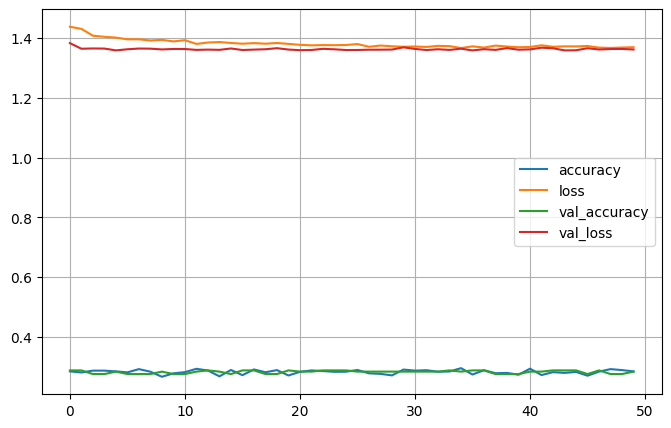

In [28]:
#save the model
model.save('models/Transfer.keras')
model.save_weights('models/Transfer.weights.h5')

#plot loss and accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

# plt.gca().set_xlim(0,10)
# plt.gca().set_ylim(0,1)
plt.savefig('plots/Transfer.png')
loss, accuracy = model.evaluate(X_test,y_test)

#print accuracy    
print('Accuracy: %f' % (accuracy*100))

In [29]:
model=keras.models.load_model('models/Transfer.keras')  
loss, accuracy = model.evaluate(X_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.2845 - loss: 1.3633


## Accuracy and Loss

In [30]:
print(f'accuracy : {round(accuracy*100,3)} \n loss : {round(loss,3)}')

accuracy : 28.367 
 loss : 1.361


In [31]:

y_test_labels=lb.inverse_transform(y_test)

#predicted values
pred=np.argmax(model.predict(X_test),axis=1)
pred_labels=lb.inverse_transform(pred) #predicted labels

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 778ms/step


In [32]:
pd.Series(pred_labels).value_counts()

glioma_tumor    490
Name: count, dtype: int64

## Confusion Matrix

Text(98.2222222222222, 0.5, 'Predicted class')

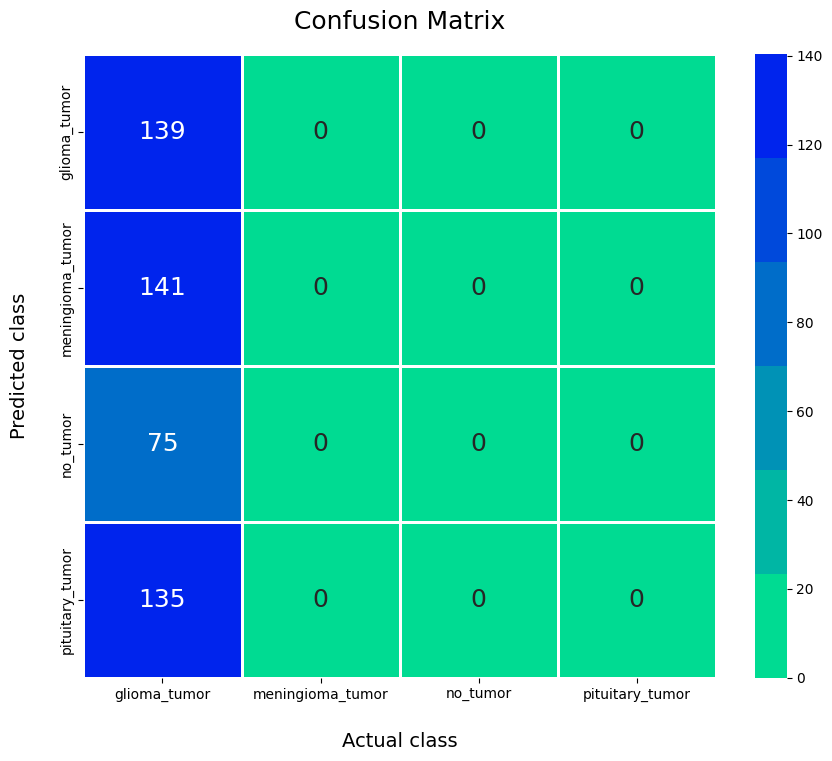

In [33]:
cm = confusion_matrix(y_test,pred)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
 #annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)
#plt.savefig(os.path.join('plots/','EfficientNetB3_confusion_matrix.png'), dpi=300)

## Model Preformance Scores

In [34]:
print(classification_report(y_test,pred,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.28      1.00      0.44       139
meningioma_tumor       0.00      0.00      0.00       141
        no_tumor       0.00      0.00      0.00        75
 pituitary_tumor       0.00      0.00      0.00       135

        accuracy                           0.28       490
       macro avg       0.07      0.25      0.11       490
    weighted avg       0.08      0.28      0.13       490



C:\Users\betsy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betsy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betsy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

In [35]:
import matplotlib.image as mpimg
TEST_DIR='input/Testing'
#fetch images from the original validation dataset and resize them in order to plot the images.
images=[] 
n_classes=4
z_max=20
for i,filenames in enumerate(os.listdir(TEST_DIR)): 
    dir_fold=os.path.join(TEST_DIR, filenames)
    print(dir_fold)
    class_images=[]
    z=0
    for filename in os.listdir(dir_fold):
        if z < z_max:
            img_path = os.path.join(dir_fold, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img,(image_size,image_size))
            class_images.append(img)
            z+=1
        else:
            break
    images.append(class_images)
images=images[:20]

input/Testing\glioma_tumor
input/Testing\meningioma_tumor
input/Testing\no_tumor
input/Testing\pituitary_tumor


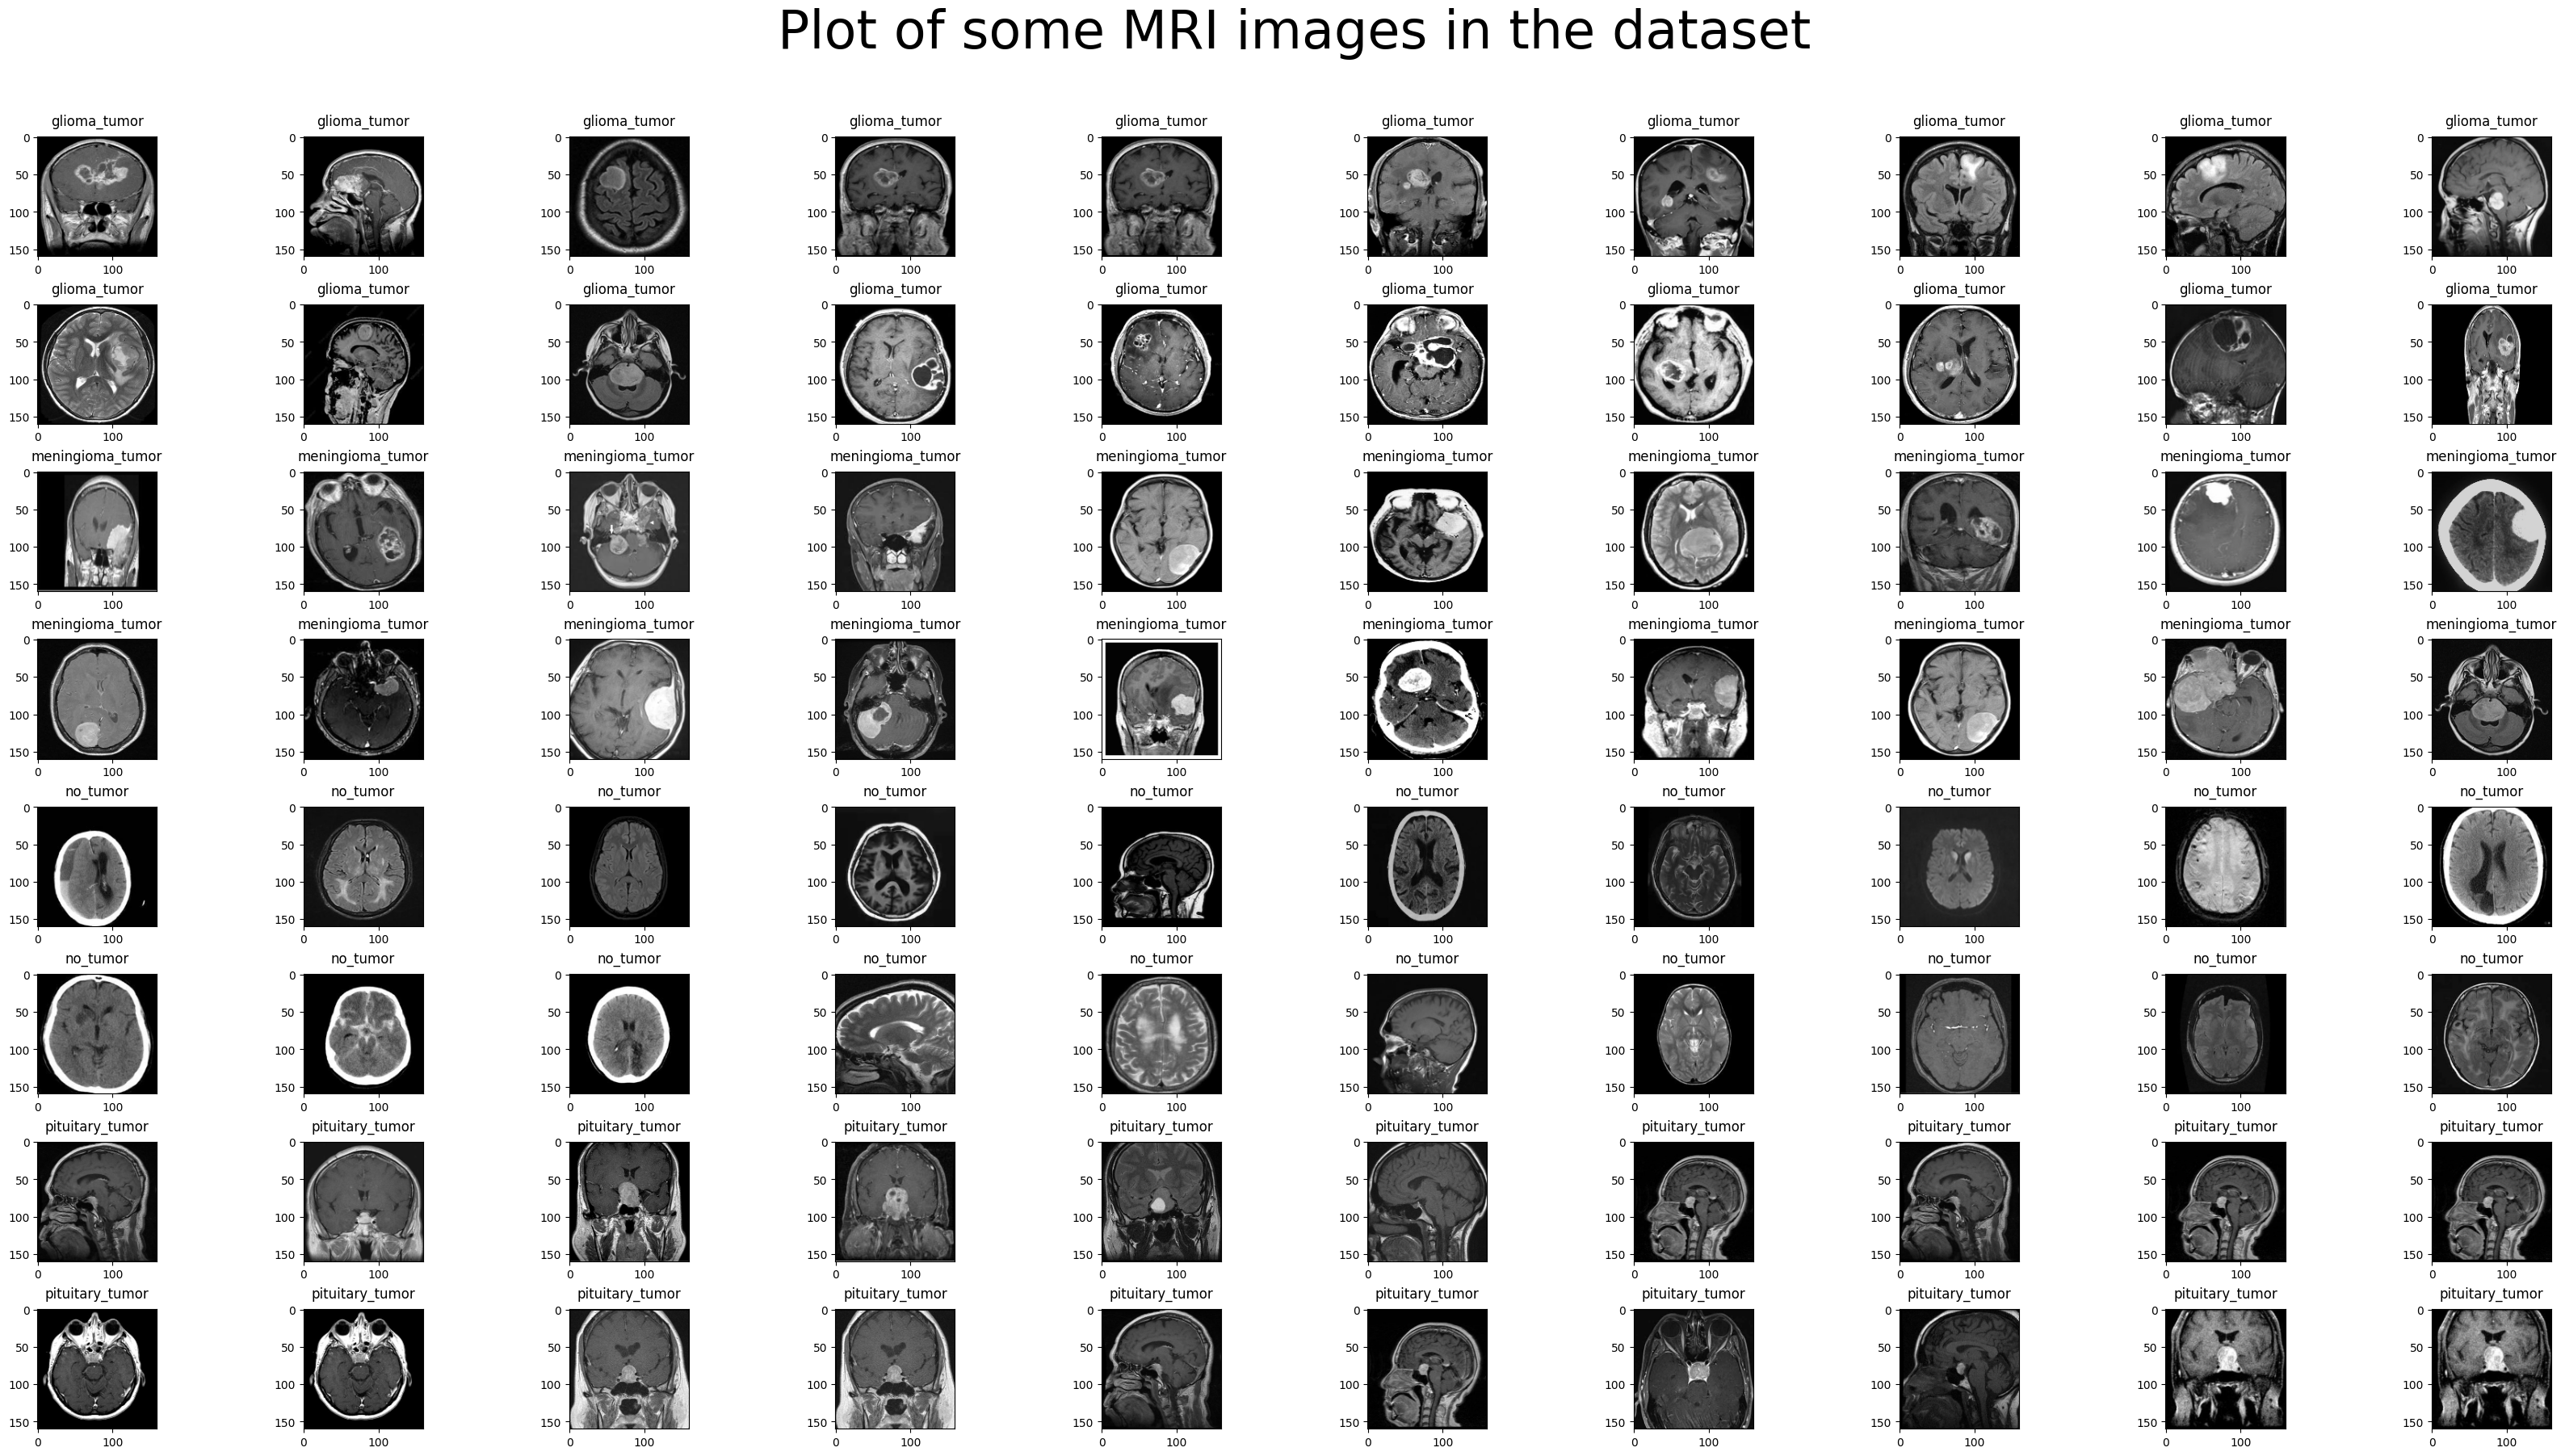

In [36]:
#here I plotted the images based on columns and z_max (defined by the user, 
#but it should be a multiple of the # of columns)
columns = 10
fig,axes=plt.subplots(int(len(images)*len(images[0])/columns),columns,figsize=(40,20))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i,ind in enumerate(images):
    #print(images_class)
    fig.suptitle('Plot of some MRI images in the dataset',fontsize=47)
    for j, image in enumerate(ind):
        #print(j,image)
        axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].imshow(image)
        axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].set_title(f'{classes[i]}',pad=10)
#image_plotting(X_test[:1])
#plt.savefig(os.path.join('plots/','Some_MRI_images_in_the_dataset_white.png'), dpi=300,facecolor='w')